# Recepie Review and User Feedback Dataset

# CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

#### 1.Bussiness Understanding


- Recepies names information.
- The recepies has ranking on the top 100 best.
- Internal user reputation score (might have different weights based on their reputation)
- Comments has unique ID (most import up-votes).
- qualify sentimen 1 to 5 / 0 denoting absence of rating

- Bussiness can develop recomender systems 
- Bussiness can develop behavior analysis 

### 2.Data Understanding

In [1]:
# Core libraries
import numpy as np
import pandas as pd
from pathlib import Path
import json

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch and ML
import torch
from transformers import (
    AutoTokenizer, 
    AutoModelForSequenceClassification
)
from sklearn.model_selection import train_test_split

# Progress tracking
from tqdm import tqdm

# Set random seed
torch.manual_seed(92)

c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
df = pd.read_csv("../data/raw/Recipe Reviews and User Feedback Dataset.csv")

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
display(df.head())
print("\nLast few rows:")
display(df.tail())

Dataset Shape: (18182, 15)

First few rows:


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...



Last few rows:


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,1622717977,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,1613036720,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,1622717844,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,1622717233,0,0,0,5,100,I just made this too. It is wonderful. As fo...
18181,118,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_262637,u_1oKW6W12cOLxiMzjA7j8nTqwFWG,nopalito,1,1622717625,0,1,0,5,193,"OMG, you must make this cake. I made it for my..."


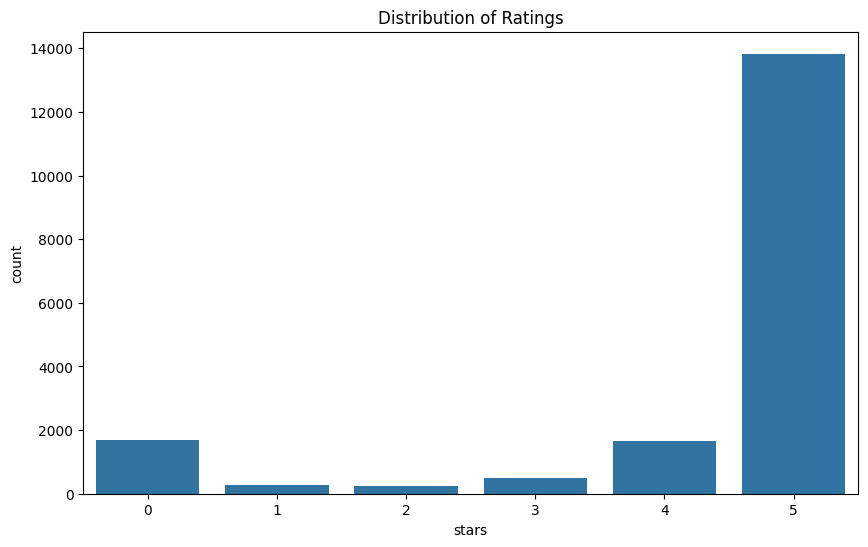

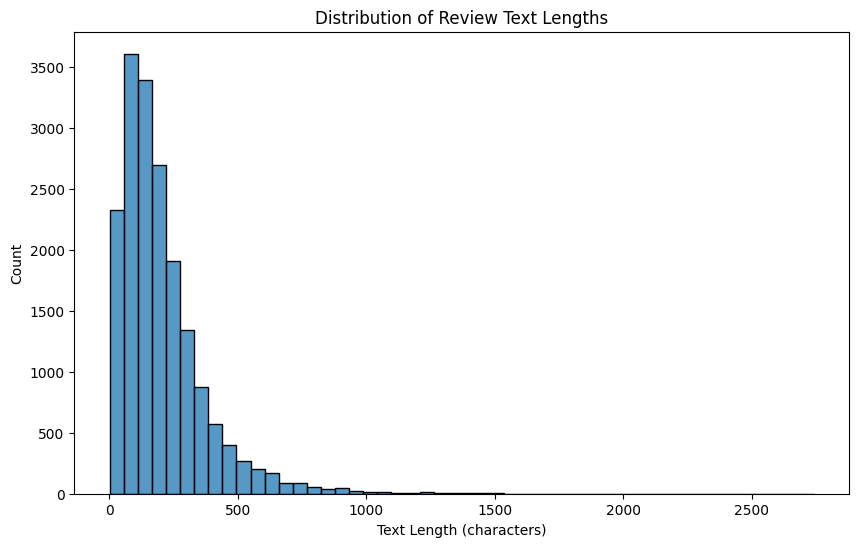


Text Length Statistics:
count    18182.000000
mean       203.894236
std        172.472595
min          1.000000
25%         90.000000
50%        161.000000
75%        266.000000
max       2742.000000
Name: text_length, dtype: float64


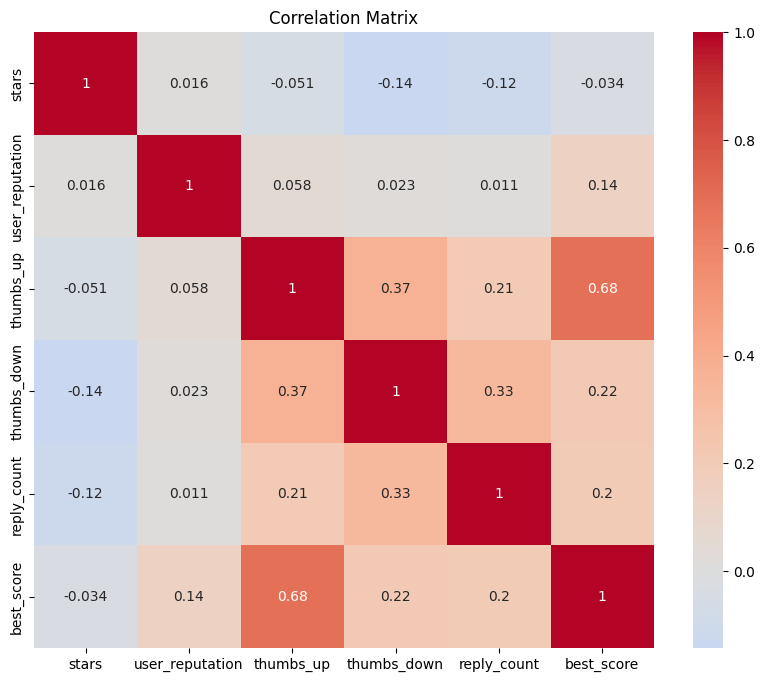

In [5]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stars')
plt.title('Distribution of Ratings')
#plt.savefig('../reports/figures/Task_3/rating_distribution.png')
plt.show()

# Text length distribution
df['text_length'] = df['text'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Text Length (characters)')
#plt.savefig('../reports/figures/Task_3/text_length_distribution.png')
plt.show()

# Calculate and display text length statistics
print("\nText Length Statistics:")
print(df['text_length'].describe())

# Correlation matrix
correlation_features = ['stars', 'user_reputation', 'thumbs_up', 
                       'thumbs_down', 'reply_count', 'best_score']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
#plt.savefig('../reports/figures/Task_3/correlation_matrix.png')
plt.show()

In [6]:
import re

def clean_text(text):
    """Clean text data"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    
    return text

# Clean text and prepare data
df['cleaned_text'] = df['text'].apply(clean_text)

# Remove empty texts and 0 star reviews
df_cleaned = df[
    (df['cleaned_text'] != "") & 
    (df['stars'] != 0)
].copy()

# Create sentiment labels
SENTIMENT_MAPPING = {
    1: 0,  # Negative
    2: 0,  # Negative
    3: 1,  # Neutral
    4: 2,  # Positive
    5: 2   # Positive
}

df_cleaned['sentiment'] = df_cleaned['stars'].map(SENTIMENT_MAPPING)

print("\nFinal Dataset Shape:", df_cleaned.shape)
print("\nSentiment Distribution:")
print(df_cleaned['sentiment'].value_counts(normalize=True).round(3))


Final Dataset Shape: (16471, 18)

Sentiment Distribution:
sentiment
2    0.939
0    0.031
1    0.030
Name: proportion, dtype: float64


In [7]:
# Constants
MAX_LENGTH = 512  # Standard BERT length
MODEL_NAME = 'bert-base-uncased'
RANDOM_STATE = 42
BATCH_SIZE = 16

# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [8]:
# Create train, validation, and test splits
train_df, temp_df = train_test_split(
    df_cleaned, 
    test_size=0.2, 
    random_state=RANDOM_STATE,
    stratify=df_cleaned['sentiment']
)

val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,
    random_state=RANDOM_STATE,
    stratify=temp_df['sentiment']
)

print("\nDataset splits:")
print(f"Train set: {len(train_df)} reviews")
print(f"Validation set: {len(val_df)} reviews")
print(f"Test set: {len(test_df)} reviews")


Dataset splits:
Train set: 13176 reviews
Validation set: 1647 reviews
Test set: 1648 reviews


In [9]:
# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

class RecipeReviewDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        text = str(self.df.iloc[idx]['cleaned_text'])
        label = self.df.iloc[idx]['sentiment']
        
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [17]:
# Create dataset objects
train_dataset = RecipeReviewDataset(train_df, tokenizer, MAX_LENGTH)
val_dataset = RecipeReviewDataset(val_df, tokenizer, MAX_LENGTH)
test_dataset = RecipeReviewDataset(test_df, tokenizer, MAX_LENGTH)

# Create dataloaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    pin_memory=True
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    pin_memory=True
)

# Verify dataloader shapes
batch = next(iter(train_loader))
print("\nBatch shapes:")
print(f"Input IDs: {batch['input_ids'].shape}")
print(f"Attention mask: {batch['attention_mask'].shape}")
print(f"Labels: {batch['labels'].shape}")


Batch shapes:
Input IDs: torch.Size([16, 512])
Attention mask: torch.Size([16, 512])
Labels: torch.Size([16])


In [10]:
def setup_model():
    """Initialize the BERT model for sequence classification"""
    model = AutoModelForSequenceClassification.from_pretrained(
        MODEL_NAME,
        num_labels=3,  # Negative, Neutral, Positive
        problem_type="single_label_classification"
    ).to(device)
    
    return model

# Initialize model
model = setup_model()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
from torch.optim import AdamW
from torch.optim.lr_scheduler import ReduceLROnPlateau

def setup_training(model, learning_rate=2e-5):
    """
    Setup optimizer and scheduler
    """
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    scheduler = ReduceLROnPlateau(
        optimizer, 
        mode='min',
        factor=0.1,
        patience=2,
        verbose=True
    )
    
    return optimizer, scheduler

# Initialize optimizer and scheduler
optimizer, scheduler = setup_training(model)

c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [12]:
def train_epoch(model, train_loader, optimizer, device):
    """
    Training loop for one epoch
    """
    model.train()
    total_loss = 0
    
    progress_bar = tqdm(train_loader, desc='Training')
    for batch in progress_bar:
        # Move batch to device
        batch = {k: v.to(device) for k, v in batch.items()}
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        progress_bar.set_postfix({'loss': loss.item()})
    
    return total_loss / len(train_loader)

In [13]:
from sklearn.metrics import classification_report

def evaluate(model, eval_loader, device):
    """
    Evaluation function
    """
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(eval_loader, desc='Evaluating'):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            
            loss = outputs.loss
            total_loss += loss.item()
            
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())
    
    # Calculate metrics
    report = classification_report(
        all_labels,
        all_preds,
        target_names=['Negative', 'Neutral', 'Positive'],
        output_dict=True
    )
    
    return {
        'loss': total_loss / len(eval_loader),
        'metrics': report
    }

In [15]:
def train_model(model, train_loader, val_loader, optimizer, scheduler, 
                num_epochs=3, save_dir="../reports/model_evaluation/Task_3/"):
    """
    Main training loop with model saving and metric tracking
    """
    # Setup saving directory
    Path(save_dir).mkdir(parents=True, exist_ok=True)
    
    # Initialize tracking variables
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []
    
    print(f"Starting training on {device}")
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        print("-" * 40)
        
        # Training phase
        train_loss = train_epoch(model, train_loader, optimizer, device)
        train_losses.append(train_loss)
        
        # Validation phase
        val_results = evaluate(model, val_loader, device)
        val_loss = val_results['loss']
        val_losses.append(val_loss)
        
        # Print metrics
        print(f"\nTrain Loss: {train_loss:.4f}")
        print(f"Validation Loss: {val_loss:.4f}")
        print("\nValidation Metrics:")
        for label in ['Negative', 'Neutral', 'Positive']:
            metrics = val_results['metrics'][label]
            print(f"\n{label}:")
            print(f"Precision: {metrics['precision']:.3f}")
            print(f"Recall: {metrics['recall']:.3f}")
            print(f"F1-Score: {metrics['f1-score']:.3f}")
        
        # Scheduler step
        scheduler.step(val_loss)
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            print("\nSaving best model...")
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'val_loss': val_loss,
            }, f"{save_dir}/best_model.pt")
        
        # Save metrics for this epoch
        metrics_path = f"{save_dir}/metrics_epoch_{epoch+1}.json"
        with open(metrics_path, 'w') as f:
            json.dump({
                'train_loss': train_loss,
                'val_loss': val_loss,
                'classification_report': val_results['metrics']
            }, f, indent=4)
    
    return train_losses, val_losses



In [18]:
# Start training
print("Initializing training...")
train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    optimizer=optimizer,
    scheduler=scheduler
)

Initializing training...
Starting training on cuda

Epoch 1/3
----------------------------------------


Evaluating: 100%|██████████| 103/103 [04:41<00:00,  2.73s/it]
c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha


Train Loss: 0.1762
Validation Loss: 0.1376

Validation Metrics:

Negative:
Precision: 0.660
Recall: 0.647
F1-Score: 0.653

Neutral:
Precision: 0.000
Recall: 0.000
F1-Score: 0.000

Positive:
Precision: 0.966
Recall: 0.997
F1-Score: 0.982

Saving best model...

Epoch 2/3
----------------------------------------


Evaluating: 100%|██████████| 103/103 [04:40<00:00,  2.72s/it]



Train Loss: 0.1070
Validation Loss: 0.1379

Validation Metrics:

Negative:
Precision: 0.562
Recall: 0.804
F1-Score: 0.661

Neutral:
Precision: 0.667
Recall: 0.082
F1-Score: 0.145

Positive:
Precision: 0.976
Recall: 0.989
F1-Score: 0.982

Epoch 3/3
----------------------------------------


Evaluating: 100%|██████████| 103/103 [04:41<00:00,  2.73s/it]


Train Loss: 0.0731
Validation Loss: 0.1569

Validation Metrics:

Negative:
Precision: 0.743
Recall: 0.510
F1-Score: 0.605

Neutral:
Precision: 0.362
Recall: 0.429
F1-Score: 0.393

Positive:
Precision: 0.979
Recall: 0.984
F1-Score: 0.982


In [19]:
# Load best model
best_model_path = "../reports/model_evaluation/Task_3/best_model.pt"
checkpoint = torch.load(best_model_path)
model.load_state_dict(checkpoint['model_state_dict'])

# Evaluate on test set
test_results = evaluate(model, test_loader, device)

print("\nTest Set Results:")
for label in ['Negative', 'Neutral', 'Positive']:
    print(f"\n{label}:")
    metrics = test_results['metrics'][label]
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print(f"F1-Score: {metrics['f1-score']:.3f}")

C:\Users\geova\AppData\Local\Temp\ipykernel_9704\3759206297.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(best_model_path)
Evaluating: 100%|███


Test Set Results:

Negative:
Precision: 0.500
Recall: 0.608
F1-Score: 0.549

Neutral:
Precision: 0.000
Recall: 0.000
F1-Score: 0.000

Positive:
Precision: 0.971
Recall: 0.995
F1-Score: 0.983



c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\geova\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

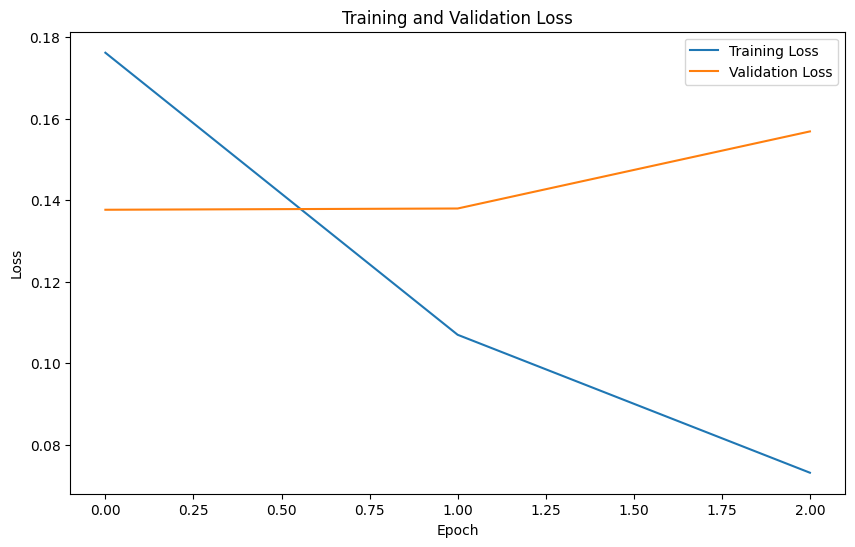

In [20]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('../reports/figures/Task_3/training_history.png')
plt.show()